In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture as mix

In [2]:
data = pd.read_excel('N225.xlsx', sheet_name='N225').dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-04-08,26767.289063,26926.410156,26700.919922,26748.890625,26748.890625,0.0
1,1988-04-11,26761.220703,26998.359375,26761.220703,26924.869141,26924.869141,0.0
2,1988-04-12,26939.130859,26985.740234,26845.019531,26930.839844,26930.839844,0.0
3,1988-04-13,26942.300781,26995.279297,26922.560547,26985.550781,26985.550781,0.0
4,1988-04-14,26969.369141,27123.189453,26969.369141,27111.349609,27111.349609,0.0
5,1988-04-15,27103.929688,27103.929688,26774.130859,26893.570313,26893.570313,0.0
6,1988-04-18,26883.839844,26984.109375,26671.449219,26671.449219,26671.449219,0.0
7,1988-04-19,26653.250000,26676.839844,26444.810547,26657.000000,26657.000000,0.0
8,1988-04-20,26662.779297,26894.240234,26662.779297,26864.089844,26864.089844,0.0
9,1988-04-21,26870.740234,26870.740234,26790.789063,26828.160156,26828.160156,0.0


In [3]:
dates = data['Date'].values
opens = data['Open'].values
closes = data['Close'].values
highs = data['High'].values
lows = data['Low'].values
adjcloses = data['Adj Close'].values

# The factors:
opclsp = ((data['Open']-data['Close'])/data['Open']).values*100# % change in price during the day
highlowsp = ((data['High']-data['Low'])/data['Close']).values*100 # Spread of high low
prc_ret = data['Close'].pct_change().fillna(0)*100 # Daily price change
data['Return Daily'] = prc_ret
Vol_change = data['Volume'].pct_change().fillna(0)*100
Vol_change[Vol_change==np.inf] = 0
log_ret = np.log((prc_ret+100)/100)

In [4]:
def get_rolling_vol(vol_wind,lst):
    vol_lst = []
    for i in range(len(lst)):
        if i<vol_wind:
            vol_lst.append(0)
        else:
            vol_lst.append(np.std(lst[i-vol_wind:i]))
    return np.array(vol_lst)
#vol30 = get_rolling_vol(30, data['Close'])
#vol100 = get_rolling_vol(100, prc_ret)
#vol250 = get_rolling_vol(250, data['Close'])
#vol500 = get_rolling_vol(500, data['Close'])
#vol1000 = get_rolling_vol(1000, data['Close'])

In [5]:
slices = [int(len(data)*0.2),int(len(data)*0.4),int(len(data)*0.6),int(len(data)*0.8),len(data)-1]
slices

[1532, 3064, 4597, 6129, 7661]

In [7]:
def plot_scatter(ret, wind, vollst, highvol_mark, 
                 testing=True):
    fig = plt.figure()
    fig.set_size_inches((18.5,10.5))
    if testing:
        for i in range(wind,len(ret[4])):
            if ret[4][i]==highvol_mark:
                plt.scatter(ret[7][i], vollst[i], color='r', s=4)
            else:
                plt.scatter(ret[7][i], vollst[i], color='g', s=4)
        plt.title('Testing Period LogReturn with Vol')
                
    else: #Training
        for i in range(wind,len(ret[0])):
            if ret[0][i]==highvol_mark:
                plt.scatter(ret[3][i], vollst[i], color='r', s=2)
            else:
                plt.scatter(ret[3][i], vollst[i], color='g', s=2)
        plt.title('Training Period LogReturn with Vol')
    plt.show()
    return

In [6]:
# Slice off according to the index and return the rest
def slicer(array, test_p):
    a_shape = array.shape
    head = array[0:test_p[0]]
    tail = array[test_p[1]:]
    ret = np.append(head,tail)
    return ret.reshape(int(len(ret)/a_shape[1]),a_shape[1])

to_float = lambda x : [round(x[i],4) for i in range(len(x))]

# structuring regression data
def structuring_data(test_p,
                     window=0,
                     vollst=0):
    hl = highlowsp[window:]
    oc = opclsp[window:]
    pr = prc_ret[window:]
    date = dates[window:]
    vc = Vol_change[window:]
    lr = log_ret[window:]
    #vol = vollst[window:]
    log_diff = np.append([0],np.diff(lr))
    x = np.column_stack([lr])
    lengthx = len(x)
    #x_train, x_test, dates_train, dates_test = model_selection.train_test_split(x, dates[window:], test_size = 0.2, random_state = 2019)
    x_train, x_test, dates_train, dates_test = slicer(x,test_p), x[test_p[0]:test_p[1]], np.append(date[0:test_p[0]], date[test_p[1]:]), date[test_p[0]:test_p[1]]
    #return x_train
    model = mix.GaussianMixture(n_components=2,covariance_type="full")
    model.fit(x_train)
    train_hiddens = model.predict(x_train)
    print('Training Period Variances:')
    print(np.diag(model.covariances_[0]))
    print(np.diag(model.covariances_[1]))
    
    hiddens = model.predict(x_test)
    print('Score for test:',model.score(x_test))
    print('Score for training:',model.score(x_train))
    
    print('States 1: %d. States 2: %d.'%(len(hiddens[hiddens==0]),len(hiddens[hiddens==1])))
    np.set_printoptions(suppress=True)
    print('The means of state 0:')
    print(model.means_[0])
    print('The means of state 1:')
    print(model.means_[1])

    print(len(x_test),len(dates_test))
    closes_train = np.append(closes[0:test_p[0]], closes[test_p[1]:])
    closes_test = closes[test_p[0]:test_p[1]]
    lr_train = np.append(lr[0:test_p[0]], lr[test_p[1]:])
    lr_test = np.array(lr[test_p[0]:test_p[1]])
        
    print(len(train_hiddens),len(closes_train),len(dates_train),len(lr_train),len(hiddens),len(closes_test),len(dates_test),len(lr_test))
    
    return [train_hiddens, dates_train, closes_train, lr_train, 
            hiddens, dates_test, closes_test, lr_test, 
            [np.diag(model.covariances_[0]),np.diag(model.covariances_[1])]]

In [34]:
def plot_logret(ret, test_p, testing=True, return_series=False):
    
    fig2 = plt.figure()
    fig2.set_size_inches(18.5, 10.5)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    
    logret_0, logret_1 = [],[]
    
    if testing==True:
        mark1, mark2, mark3 = 4, 5, 7
    else:
        mark1, mark2, mark3 = 0, 1, 3

        
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
            logret_0.append(ret[mark3][i1])
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
            logret_1.append(ret[mark3][i1])
    
    plt.legend(['State 0','State 1'])
    if testing:
        plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    else:
        plt.title('Training Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    plt.show()
    
    if return_series:
        return [logret_0, logret_1]
    
def plot_close(ret, test_p, testing=True, return_series=False):
    
    fig2 = plt.figure()
    fig2.set_size_inches(18.5, 10.5)
    highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0
    
    close_0, close_1 = [],[]
    
    if testing==True:
        mark1, mark2, mark3 = 4, 5, 6
    else:
        mark1, mark2, mark3 = 0, 1, 2

        
    for i1 in range(1,len(ret[mark1])):#len(closes)-1):
        if ret[mark1][i1]==highvol_mark:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='r')
            close_0.append(ret[mark3][i1])
        else:
            plt.plot([ret[mark2][i1-1],ret[mark2][i1]],[ret[mark3][i1-1],ret[mark3][i1]],color='g')
            close_1.append(ret[mark3][i1])
    
    plt.legend(['State 0','State 1'])
    if testing:
        plt.title('Testing Period Close Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    else:
        plt.title('Training Period Close Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
    plt.show()
    
    if return_series:
        return [close_0, close_1]

Training Period Variances:
[0.00046003]
[0.00008762]
Score for test: 2.906085976429094
Score for training: 2.8545575127231237
States 1: 252. States 2: 1280.
The means of state 0:
[-0.0016832]
The means of state 1:
[0.00090999]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 1988-04-08 to 1994-06-27.
For testing period:
Dates in state 1: 252 Dates in state 2: 1280


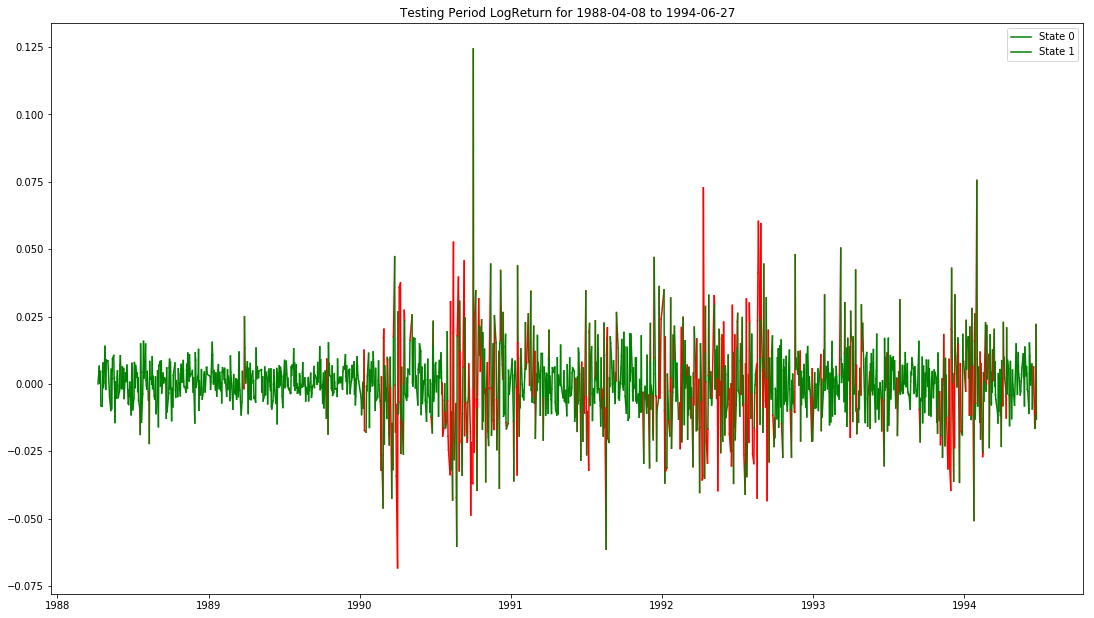

In [35]:
test_p = [0, slices[0]]
ret = structuring_data(test_p, 0)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

plot_logret(ret, test_p, True, False)
plot_logret(ret, test_p, testing=False, return_series=False)
plot_close(ret, test_p, True, False)
plot_close(ret, test_p, False, False)

## Testing Period: 1988-04-08 to 1994-06-27

Training Period Variances:
[0.00045816]
[8.73240643e-05]
Score for test: 2.906046204719378
Score for training: 2.8544809465484673
States 1: 256. States 2: 1276.
The means of state 0:
[-0.00167726]
The means of state 1:
[0.00091584]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 1988-04-08 to 1994-06-27.
For testing period:
Dates in state 1: 256 Dates in state 2: 1276


C:\Users\Lance\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


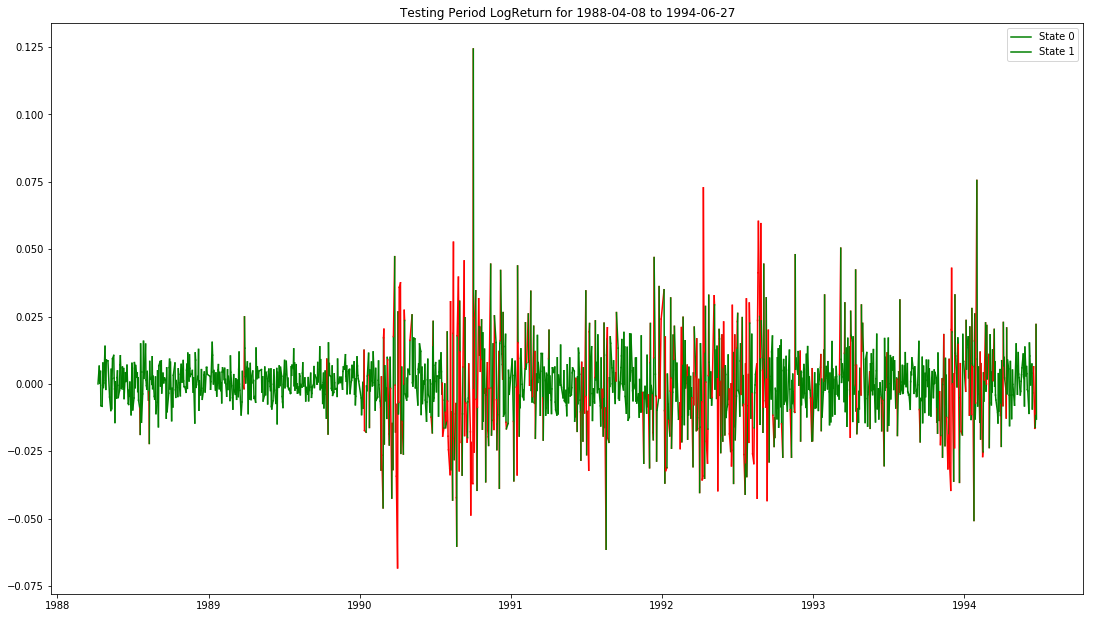

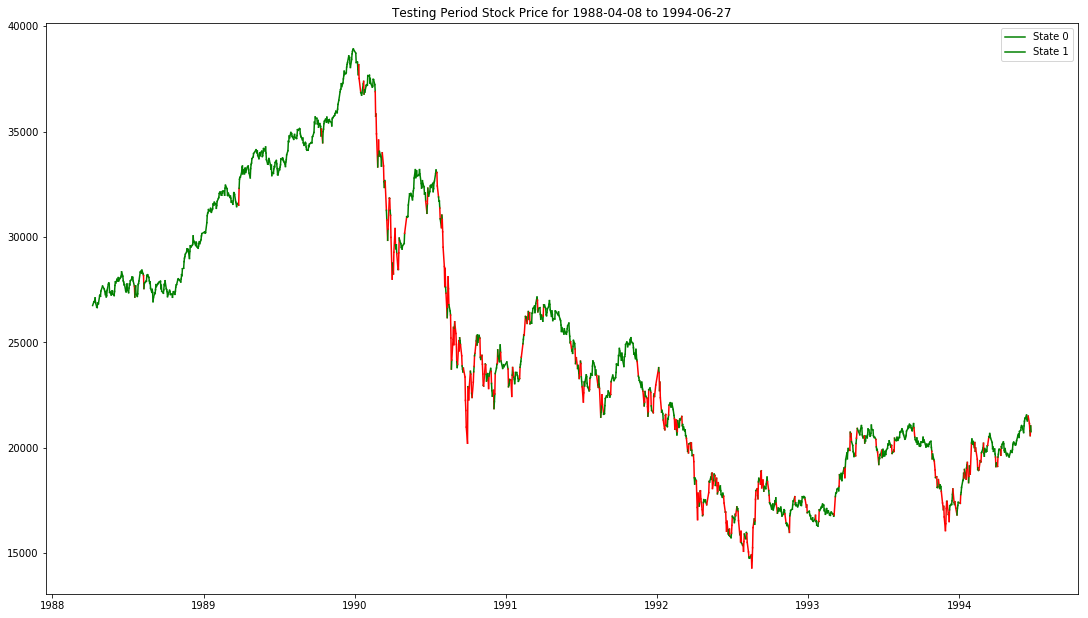

In [8]:
wind = 0
test_p = [0, slices[0]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
    

    
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
        testing_0_logret.append(ret[7][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
        testing_1_logret.append(ret[7][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

##################################################################################
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
        testing_0_close.append(ret[6][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
        testing_1_close.append(ret[6][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

For training period:
Dates in state 1: 1082 Dates in state 2: 5048


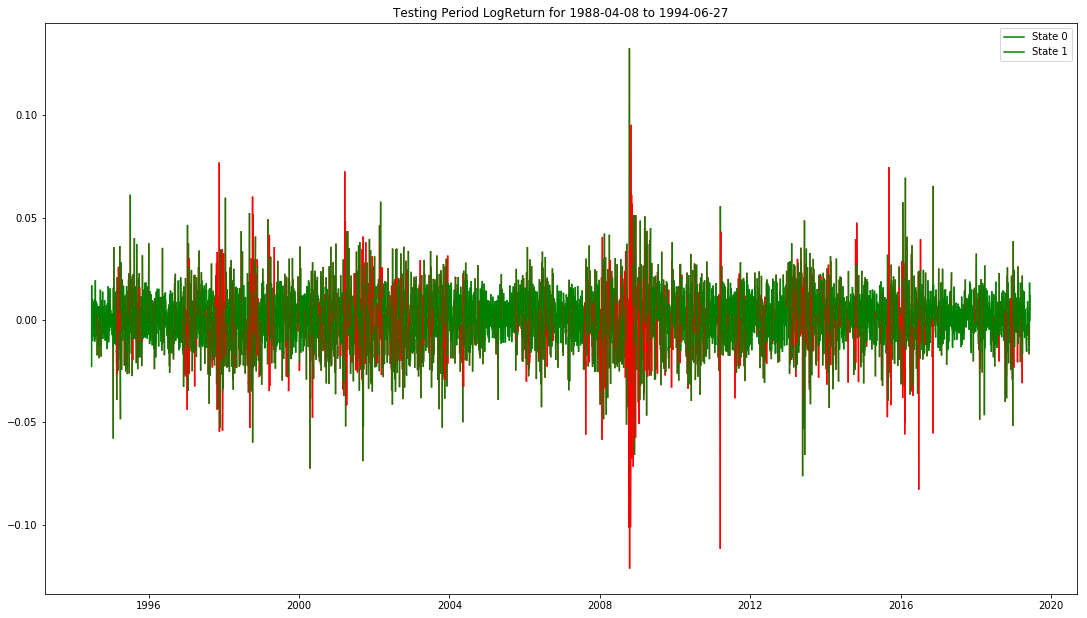

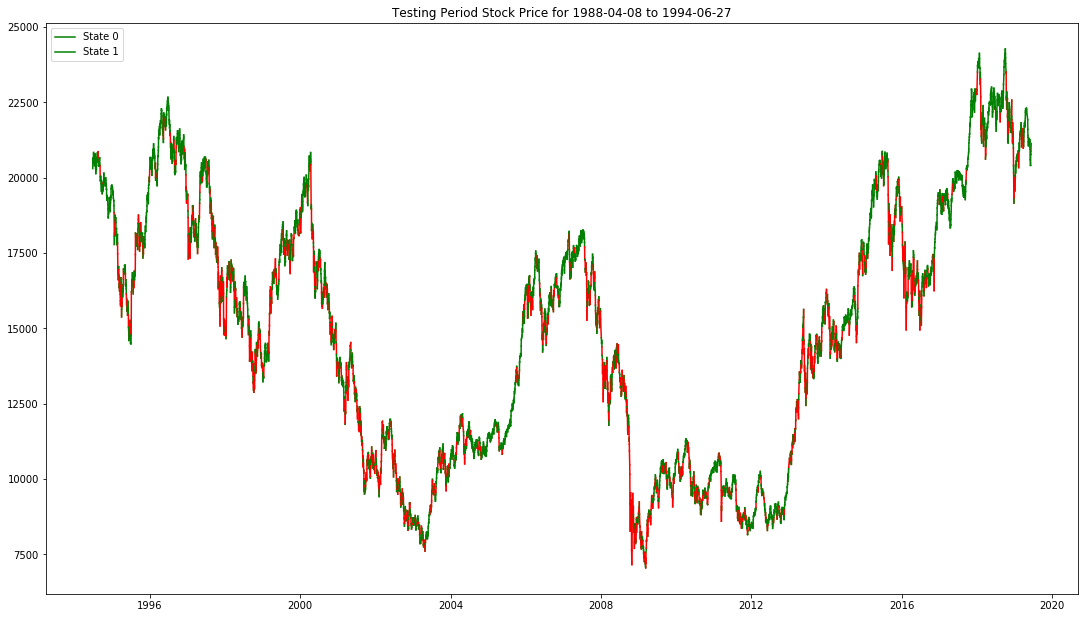

In [9]:
# For Training Period
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
        training_0_logret.append(ret[3][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
        training_1_logret.append(ret[3][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()
##################################################################################
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
        training_0_close.append(ret[2][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
        training_1_close.append(ret[2][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

In [10]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)),
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.004604748404258938,
 0.0008819298681651669,
 0.000994050671662056,
 7.074654911346726e-05)

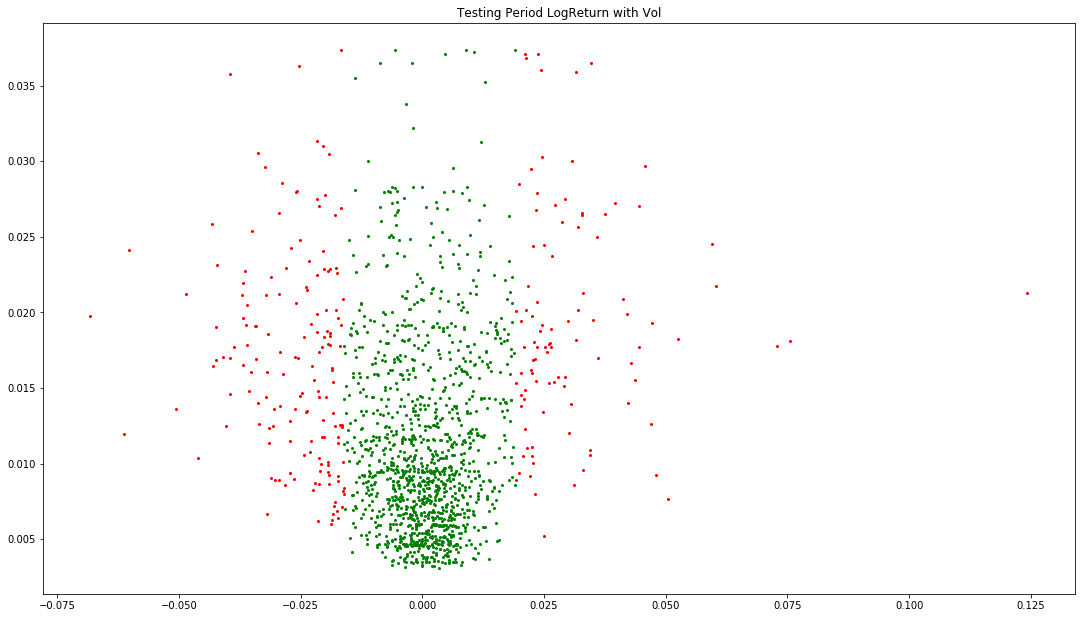

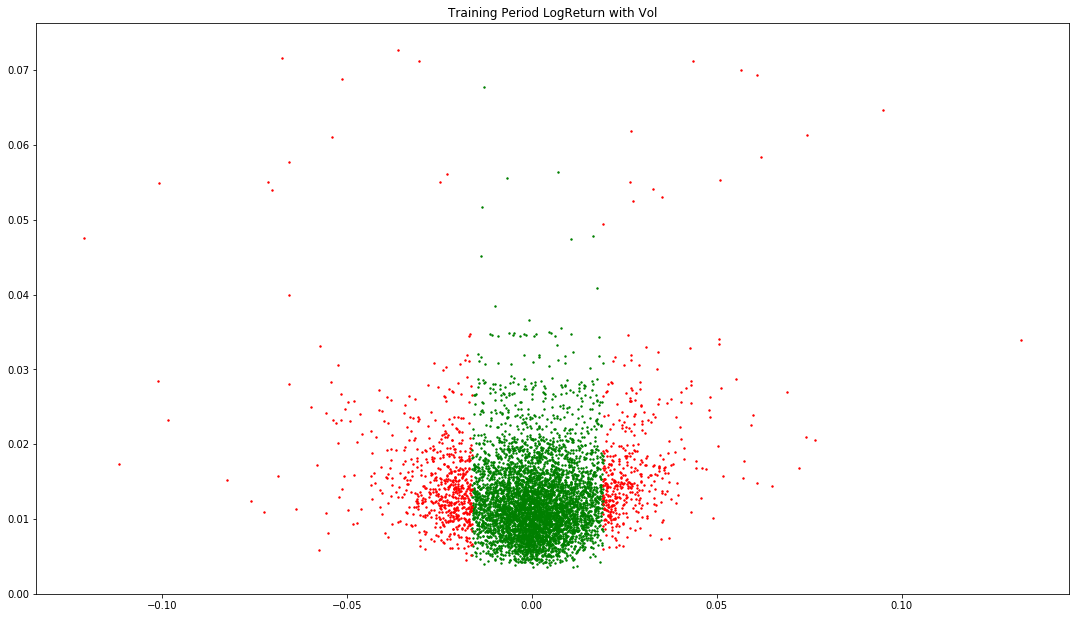

In [11]:
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 1994-06-27 to 2000-09-06

Training Period Variances:
[0.00049648]
[0.00008145]
Score for test: 2.8806146687104794
Score for training: 2.8623267042981384
States 1: 254. States 2: 1278.
The means of state 0:
[-0.00168483]
The means of state 1:
[0.00084375]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 1994-06-27 to 2000-09-06.
For testing period:
Dates in state 1: 254 Dates in state 2: 1278


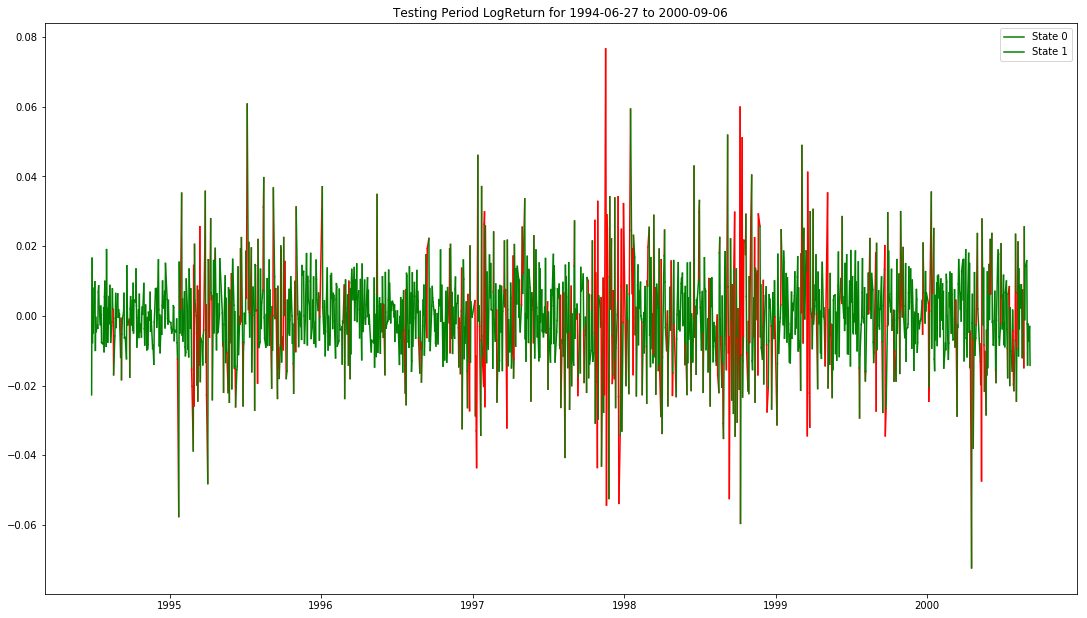

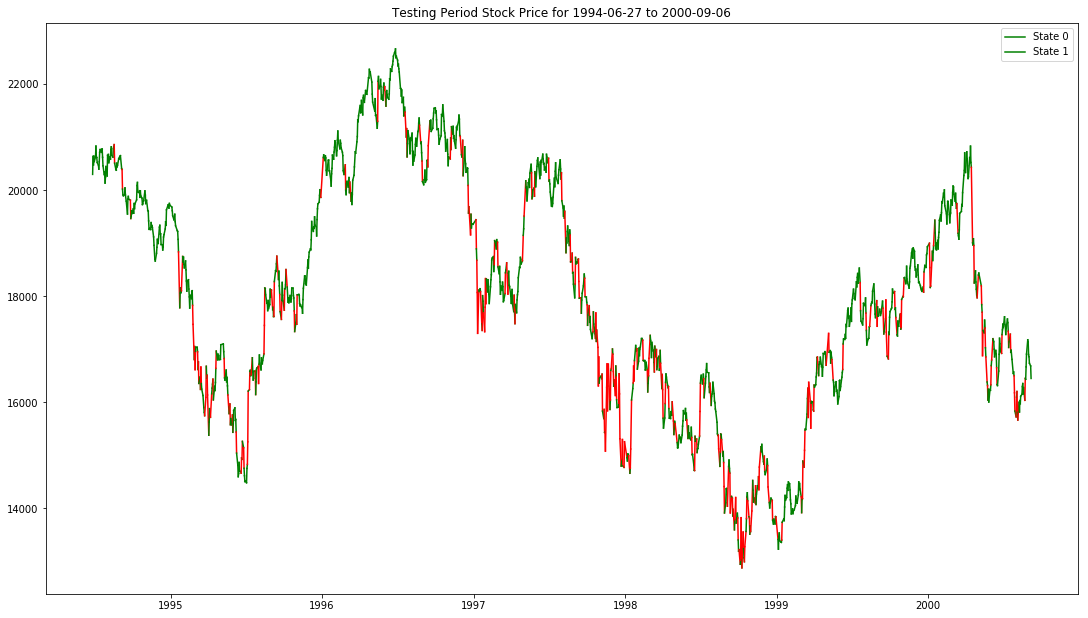

In [12]:
wind = 0
test_p = [slices[0], slices[1]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
    
testing_0_logret, testing_1_logret = [],[] 
testing_0_close, testing_1_close = [],[] 
training_0_logret, training_1_logret = [],[] 
training_0_close, training_1_close = [],[] 
    
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
        testing_0_logret.append(ret[7][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
        testing_1_logret.append(ret[7][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

##################################################################################
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
        testing_0_close.append(ret[6][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
        testing_1_close.append(ret[6][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

For training period:
Dates in state 1: 1085 Dates in state 2: 5045


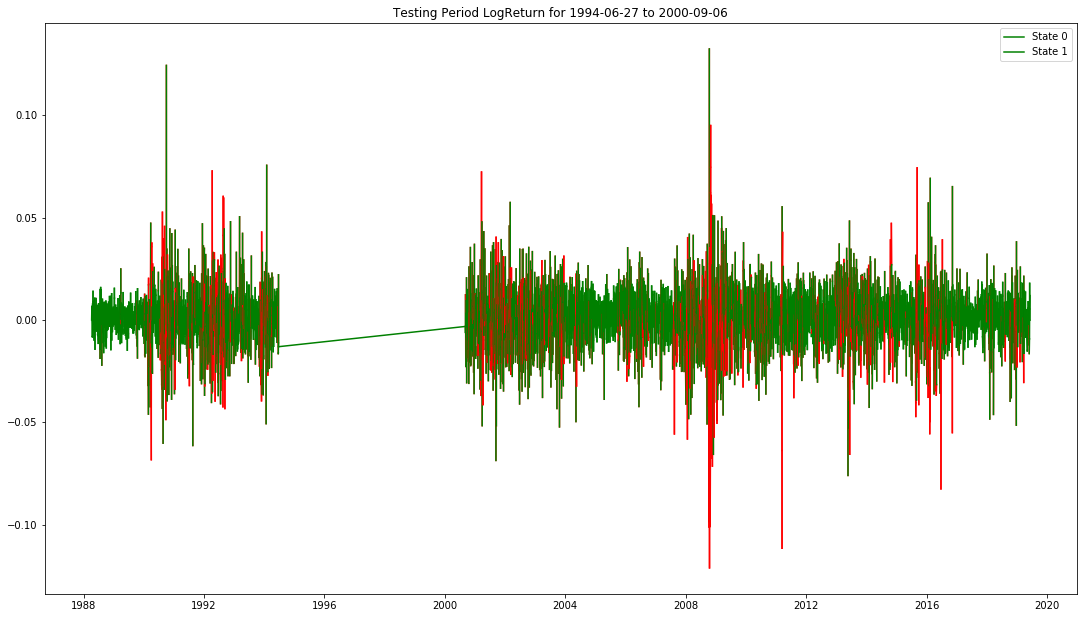

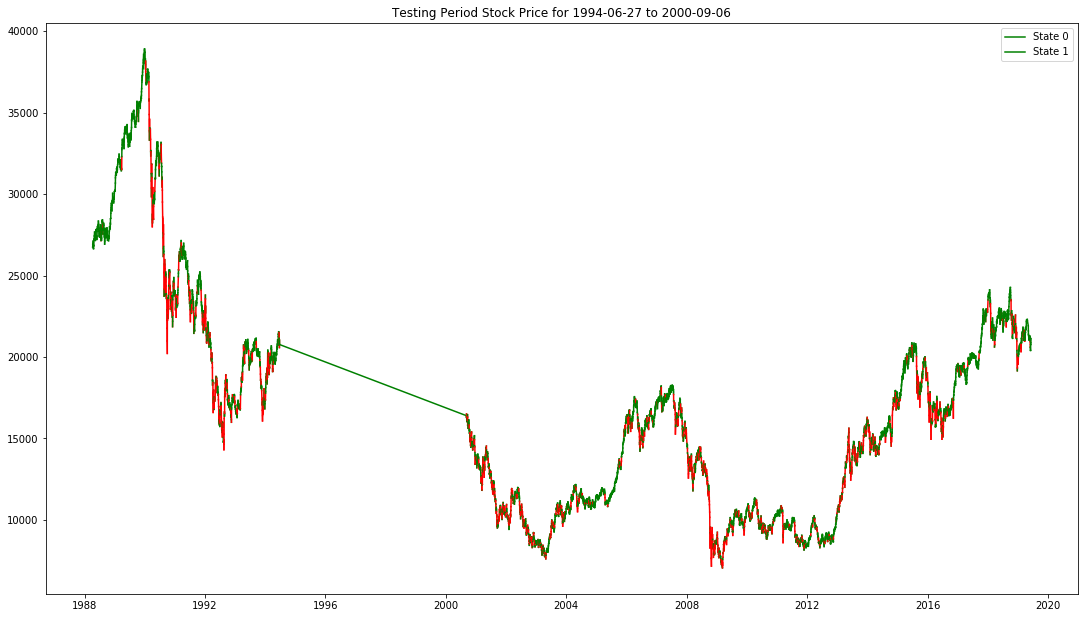

In [13]:
# For Training Period
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

highvol_mark = 1 if ret[-1][1]>ret[-1][0] else 0

    
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
        training_0_logret.append(ret[3][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
        training_1_logret.append(ret[3][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()
##################################################################################
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
        training_0_close.append(ret[2][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
        training_1_close.append(ret[2][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

In [14]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)),
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.004321751442087995,
 0.0009099242870766758,
 0.0009291038894369271,
 6.728165971801352e-05)

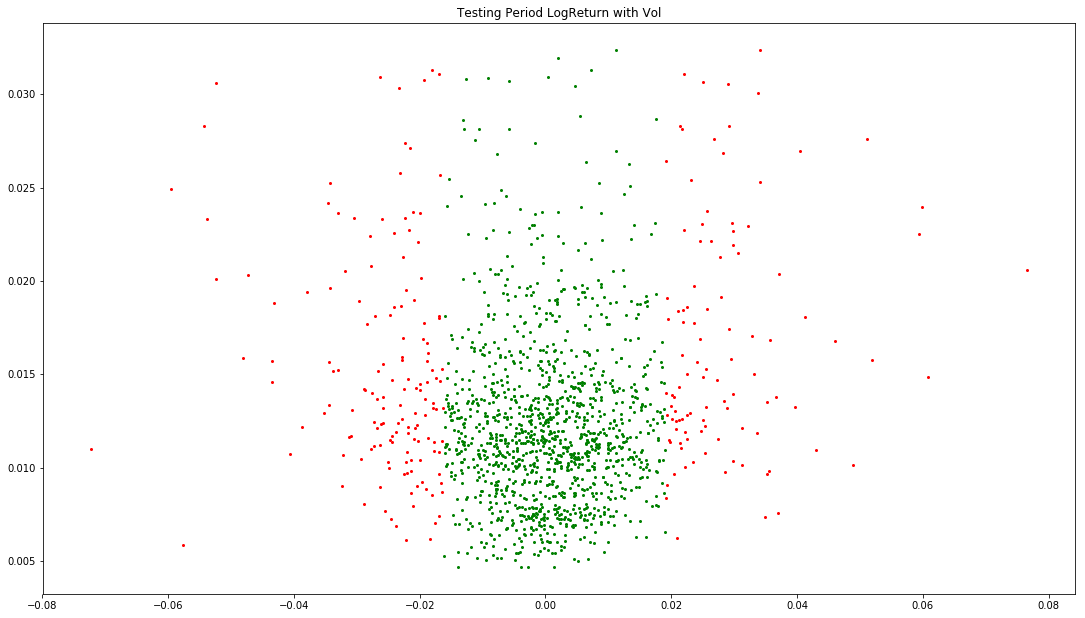

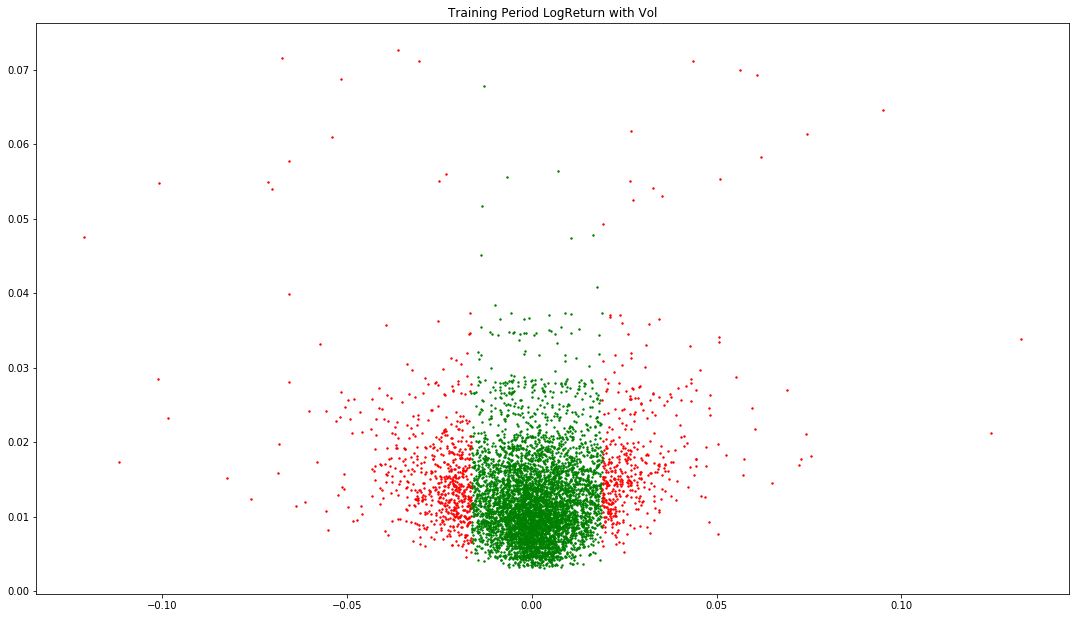

In [15]:
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2000-09-06 to 2006-11-30

Training Period Variances:
[0.00007833]
[0.00051334]
Score for test: 2.8449789156104104
Score for training: 2.871293493125076
States 1: 1234. States 2: 299.
The means of state 0:
[0.00066895]
The means of state 1:
[-0.00148844]
1533 1533
6129 6129 6129 6129 1533 1533 1533 1533
The Testing Period is 2000-09-06 to 2006-11-30.
For testing period:
Dates in state 1: 1234 Dates in state 2: 299


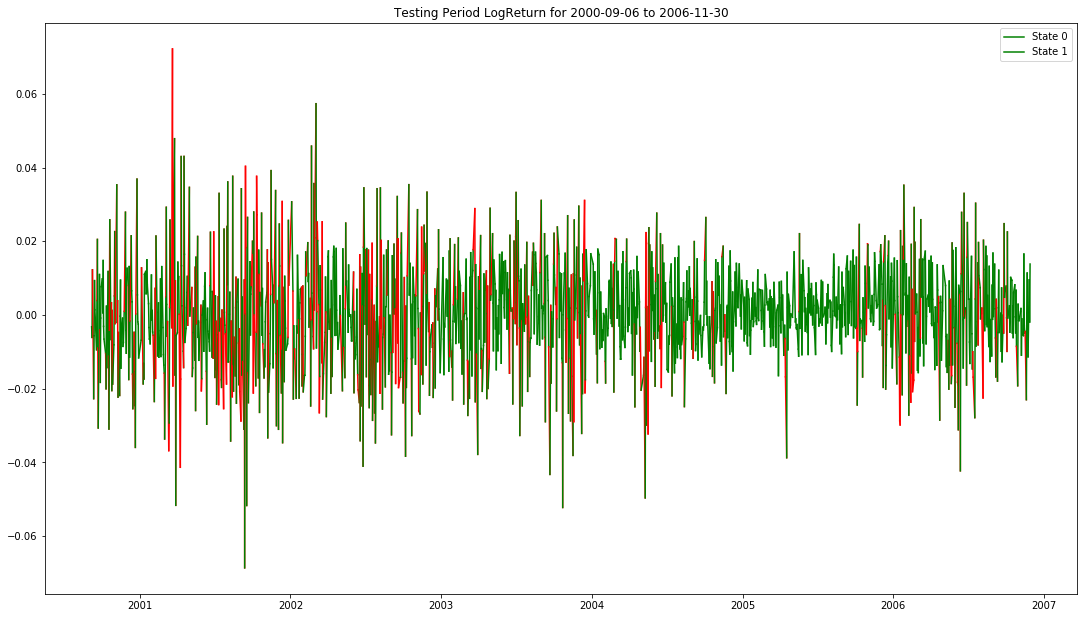

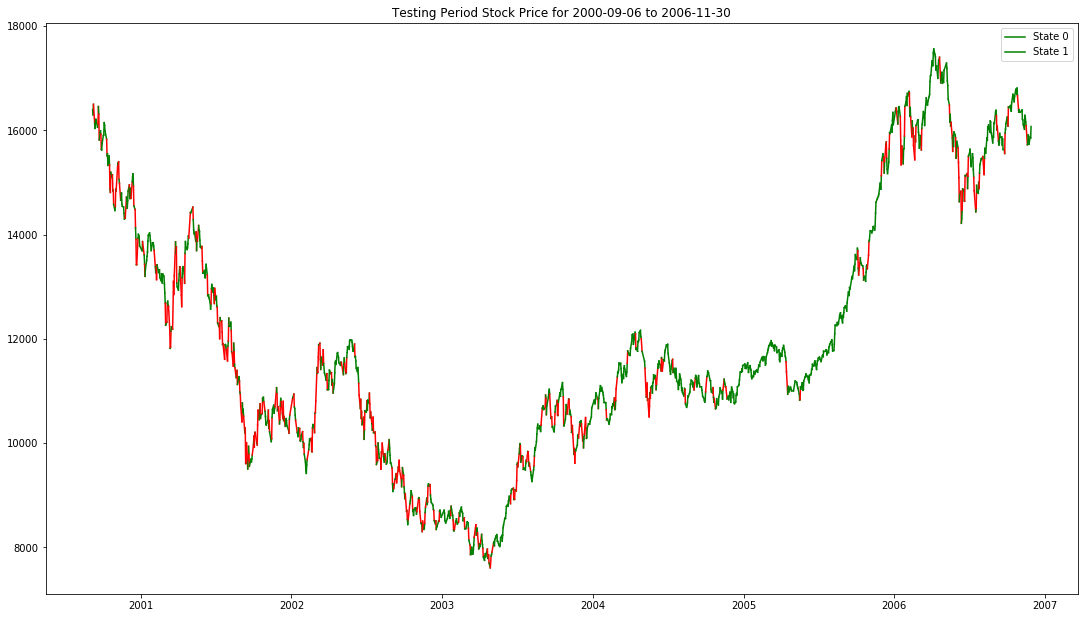

In [16]:
wind = 0
test_p = [slices[1], slices[2]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
    
testing_0_logret, testing_1_logret = [],[] 
testing_0_close, testing_1_close = [],[] 
training_0_logret, training_1_logret = [],[] 
training_0_close, training_1_close = [],[] 
    
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
        testing_0_logret.append(ret[7][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
        testing_1_logret.append(ret[7][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

##################################################################################
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
        testing_0_close.append(ret[6][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
        testing_1_close.append(ret[6][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

For training period:
Dates in state 1: 5084 Dates in state 2: 1045


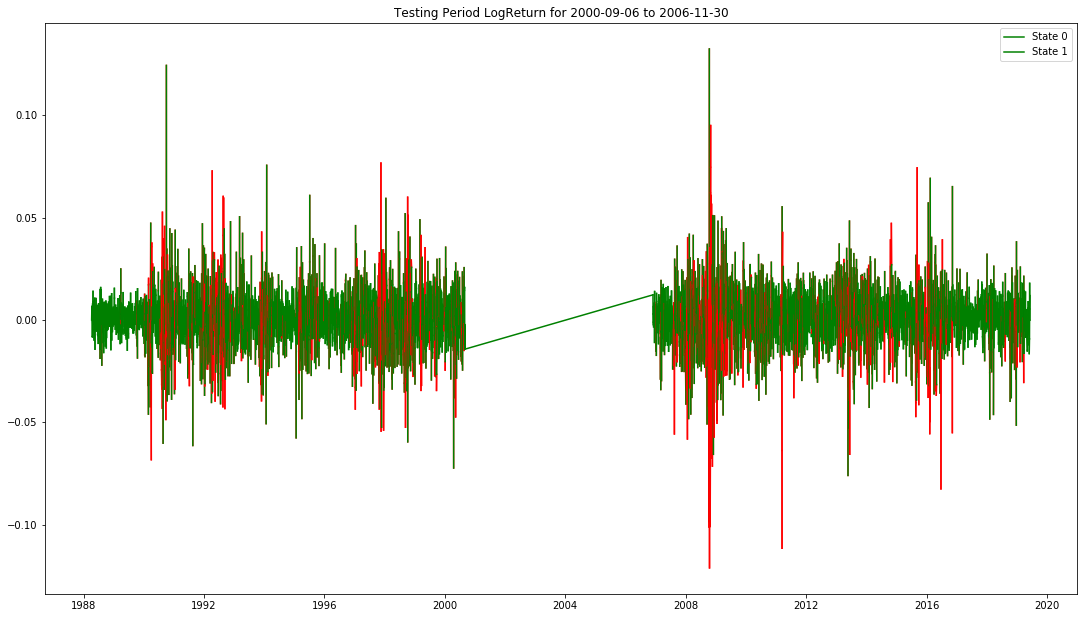

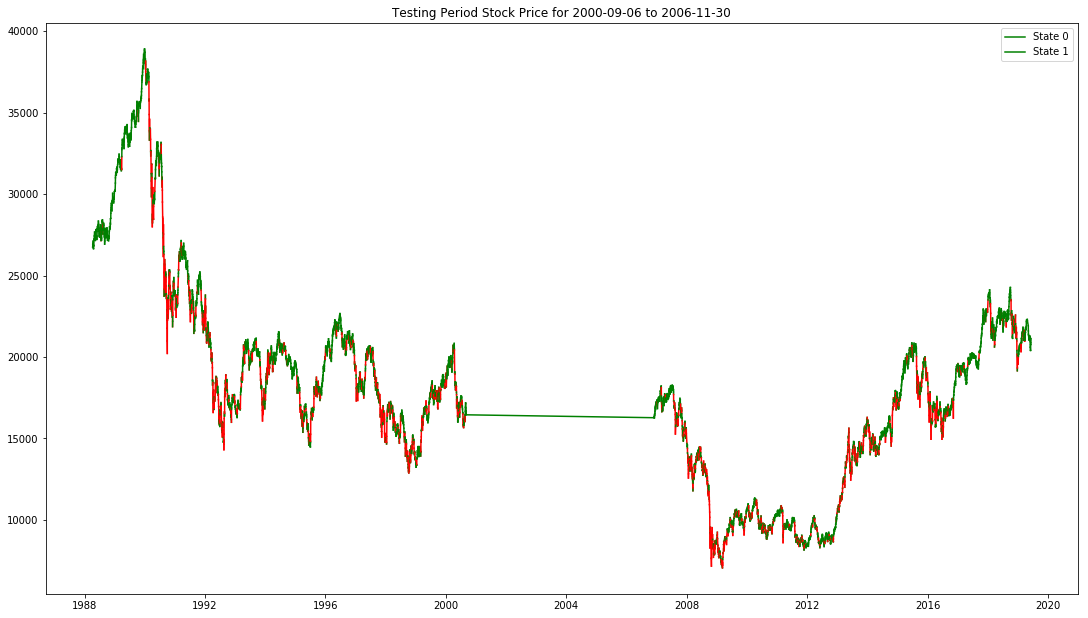

In [17]:
# For Training Period
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
        training_0_logret.append(ret[3][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
        training_1_logret.append(ret[3][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()
##################################################################################
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
        training_0_close.append(ret[2][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
        training_1_close.append(ret[2][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

In [18]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret),
 np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.003794841393385457,
 0.000700609423540901,
 0.0009040747368826034,
 7.357294722330314e-05,
 -0.0035159041451902854,
 0.000952985077350384,
 0.0006810256388128312,
 6.662372591092104e-05)

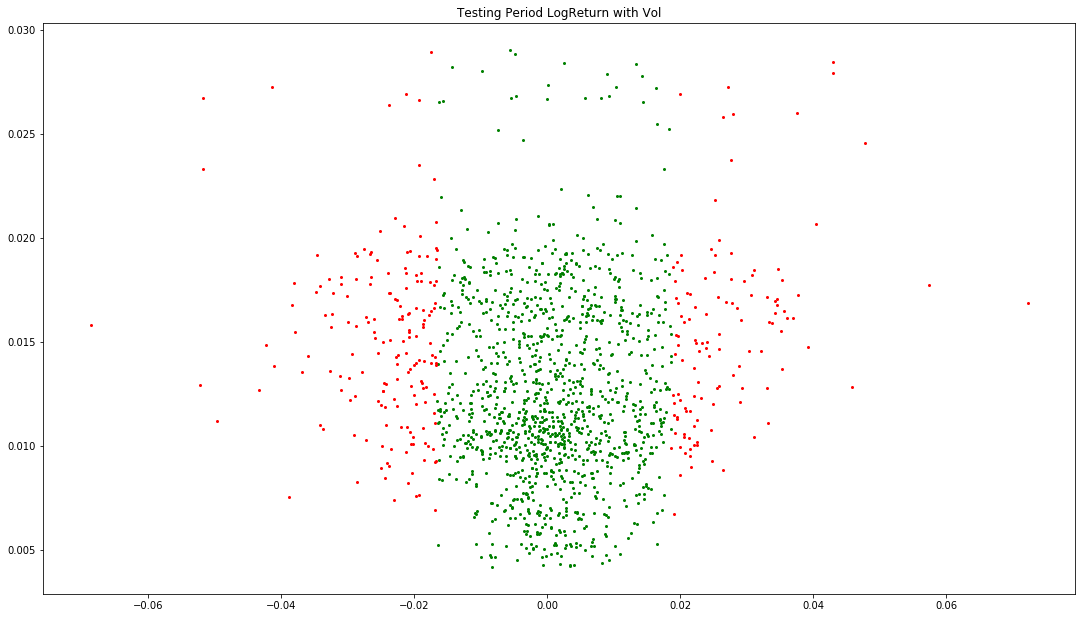

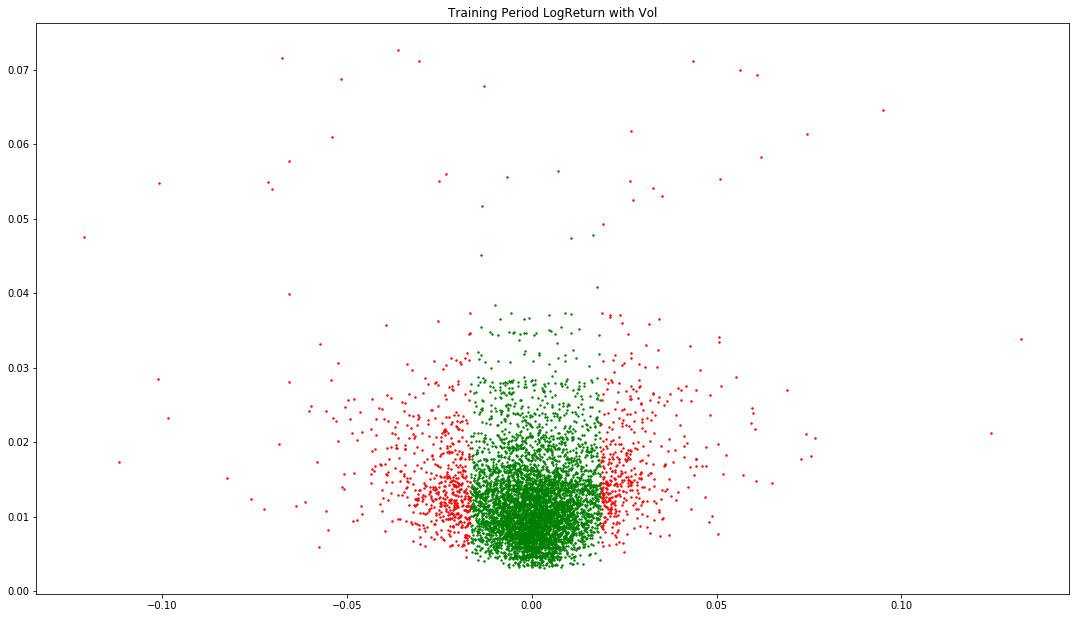

In [19]:
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2006-11-30 to 2013-03-07

Training Period Variances:
[0.00039683]
[0.0000727]
Score for test: 2.704475788050995
Score for training: 2.903312682465049
States 1: 405. States 2: 1127.
The means of state 0:
[-0.00106747]
The means of state 1:
[0.00067424]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 2006-11-30 to 2013-03-07.
For testing period:
Dates in state 1: 405 Dates in state 2: 1127


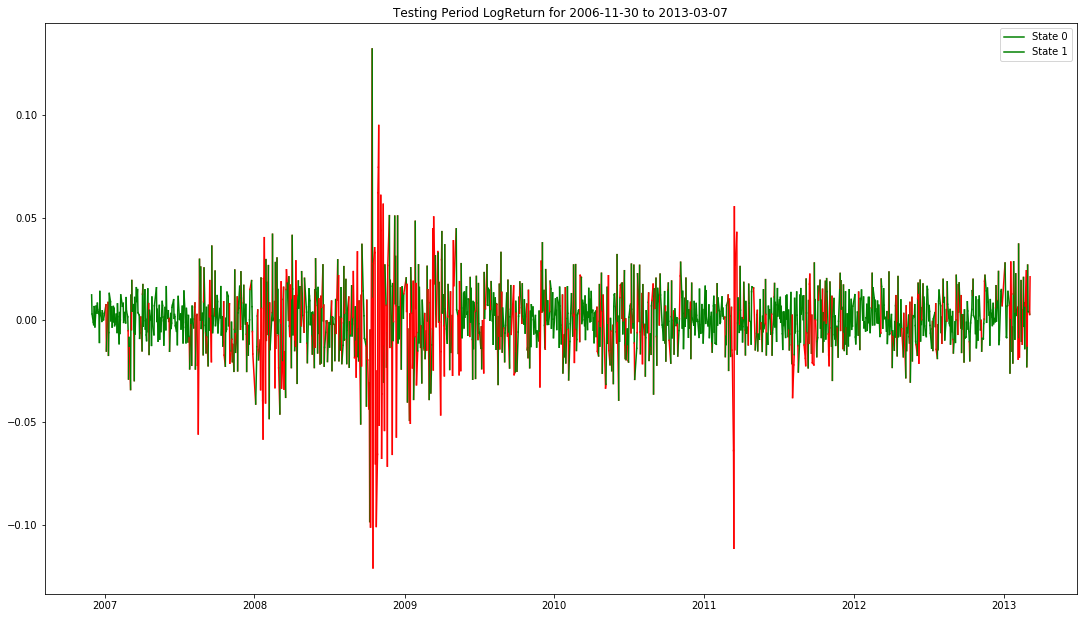

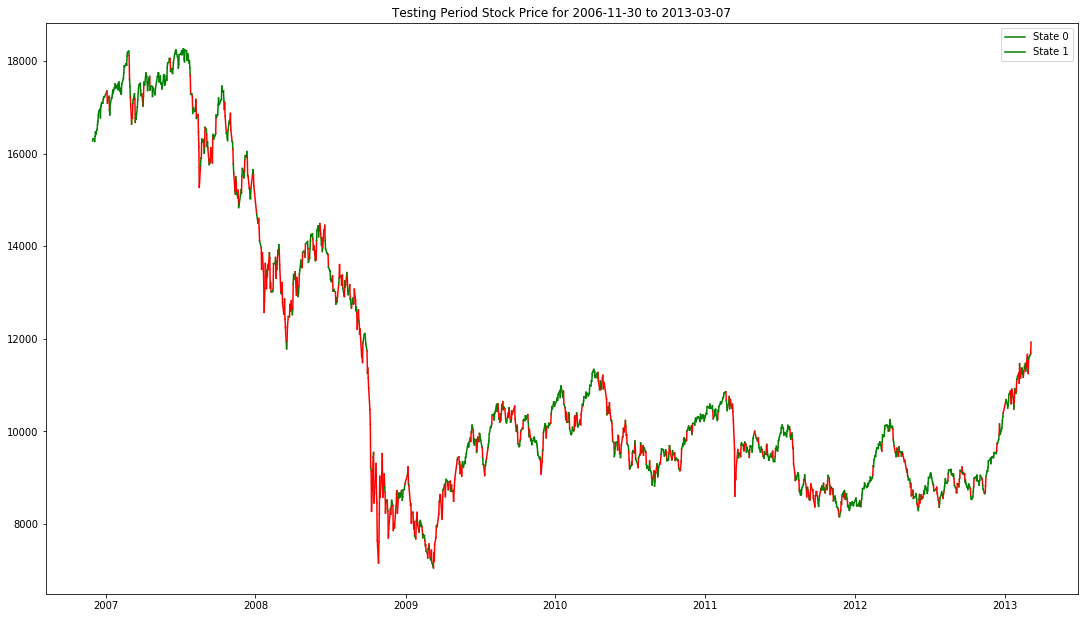

In [20]:
wind = 0
test_p = [slices[2], slices[3]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
    
testing_0_logret, testing_1_logret = [],[] 
testing_0_close, testing_1_close = [],[] 
training_0_logret, training_1_logret = [],[] 
training_0_close, training_1_close = [],[] 
    
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
        testing_0_logret.append(ret[7][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
        testing_1_logret.append(ret[7][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

##################################################################################
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
        testing_0_close.append(ret[6][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
        testing_1_close.append(ret[6][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

For training period:
Dates in state 1: 1307 Dates in state 2: 4823


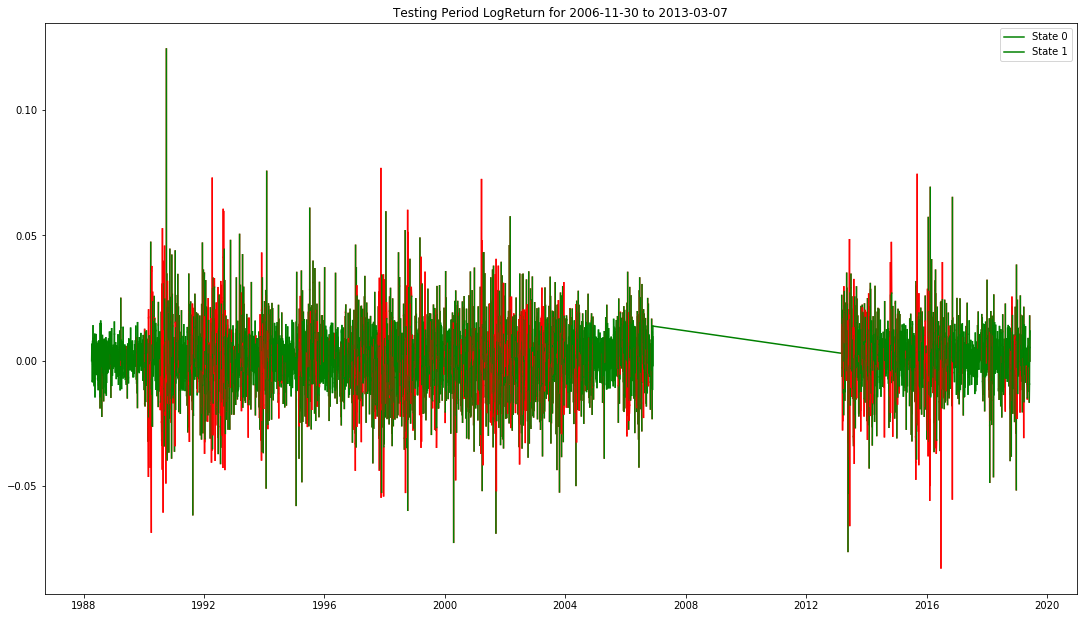

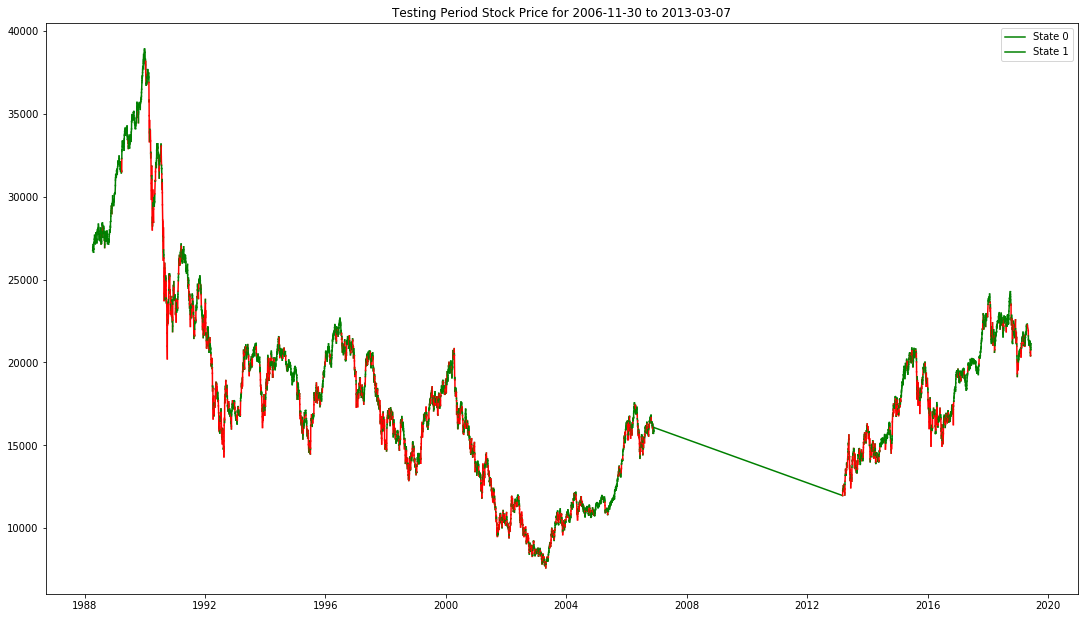

In [21]:
# For Training Period
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
        training_0_logret.append(ret[3][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
        training_1_logret.append(ret[3][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()
##################################################################################
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
        training_0_close.append(ret[2][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
        training_1_close.append(ret[2][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

In [22]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)),
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.002534612544539812,
 0.0007115136736856375,
 0.0006999672452803855,
 5.407310187830666e-05)

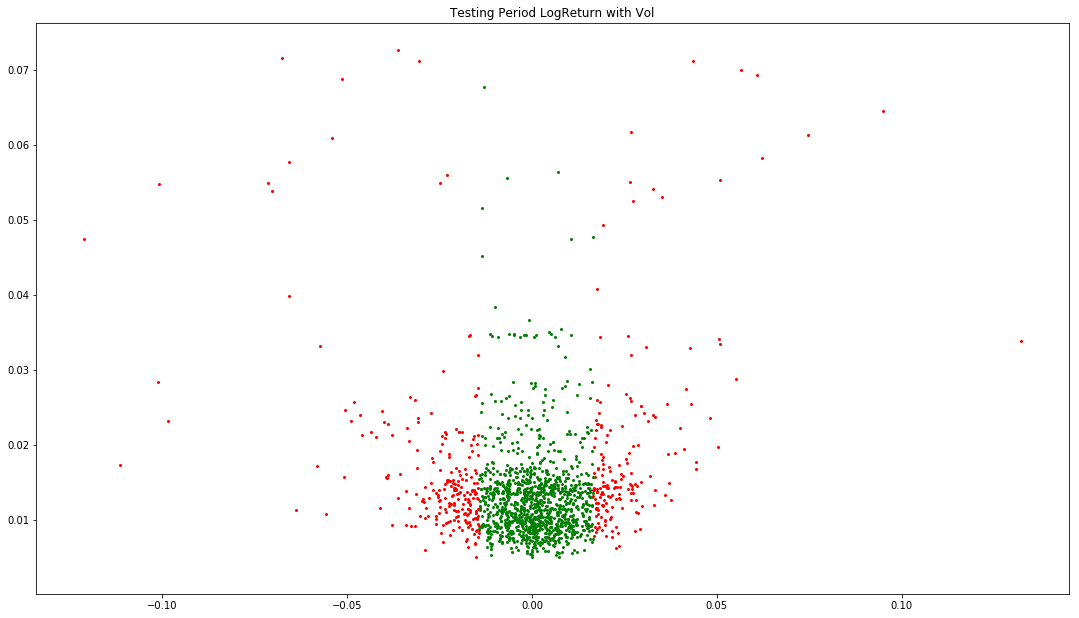

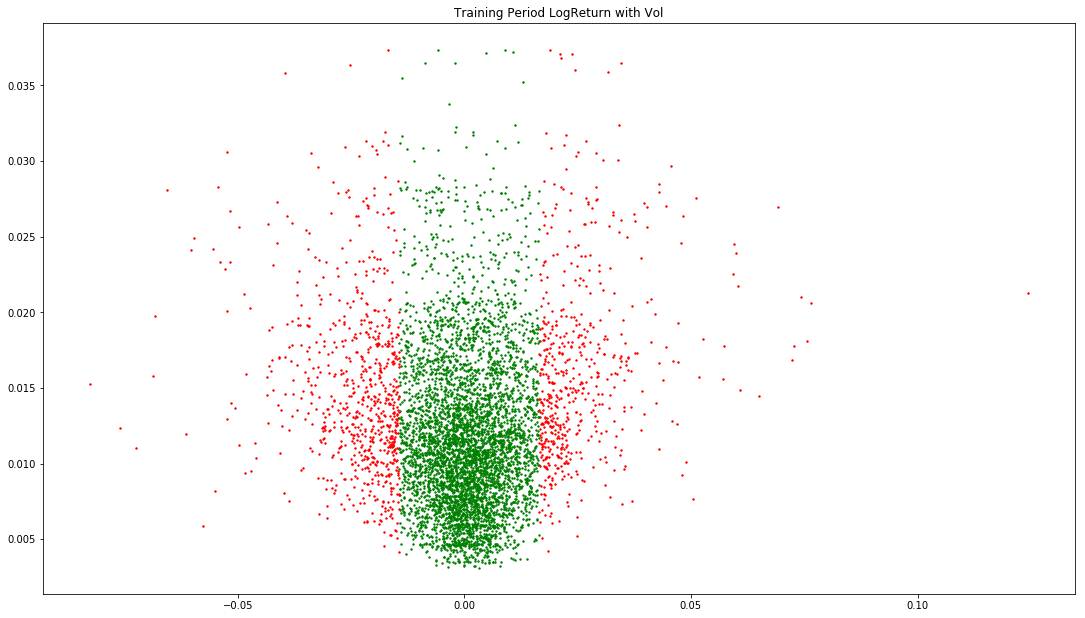

In [23]:
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)

## Testing Period 2013-03-7 to 2019-06-10

Training Period Variances:
[0.0004695]
[0.00008595]
Score for test: 2.960330004153858
Score for training: 2.840691112182049
States 1: 226. States 2: 1306.
The means of state 0:
[-0.00119362]
The means of state 1:
[0.0004784]
1532 1532
6130 6130 6130 6130 1532 1532 1532 1532
The Testing Period is 2013-03-07 to 2019-06-10.
For testing period:
Dates in state 1: 226 Dates in state 2: 1306


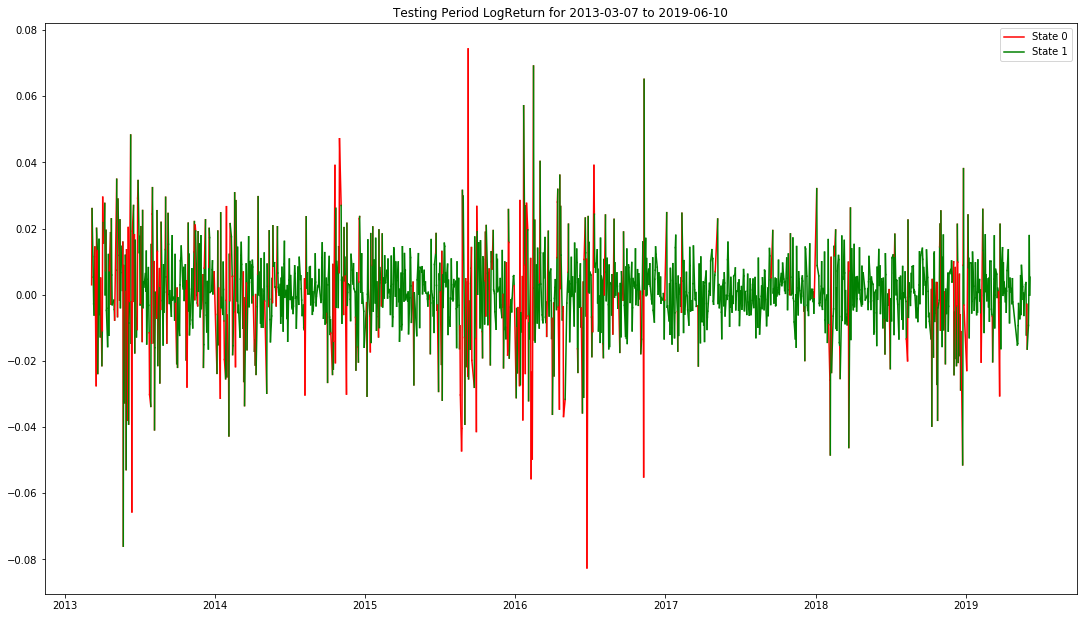

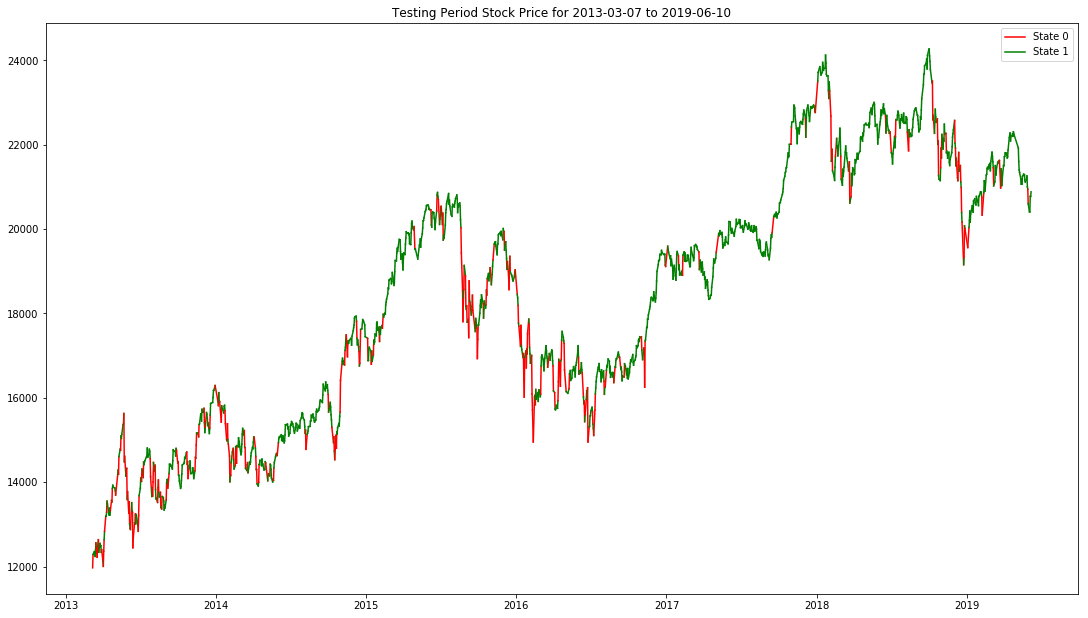

In [24]:
wind = 0
test_p = [slices[3], slices[4]]
ret = structuring_data(test_p, wind)

print('The Testing Period is %.10s to %.10s.'%(dates[test_p[0]],dates[test_p[1]]))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
    
testing_0_logret, testing_1_logret = [],[] 
testing_0_close, testing_1_close = [],[] 
training_0_logret, training_1_logret = [],[] 
training_0_close, training_1_close = [],[] 
    
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
        testing_0_logret.append(ret[7][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
        testing_1_logret.append(ret[7][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

##################################################################################
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
        testing_0_close.append(ret[6][i1])
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
        testing_1_close.append(ret[6][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

For training period:
Dates in state 1: 1171 Dates in state 2: 4959


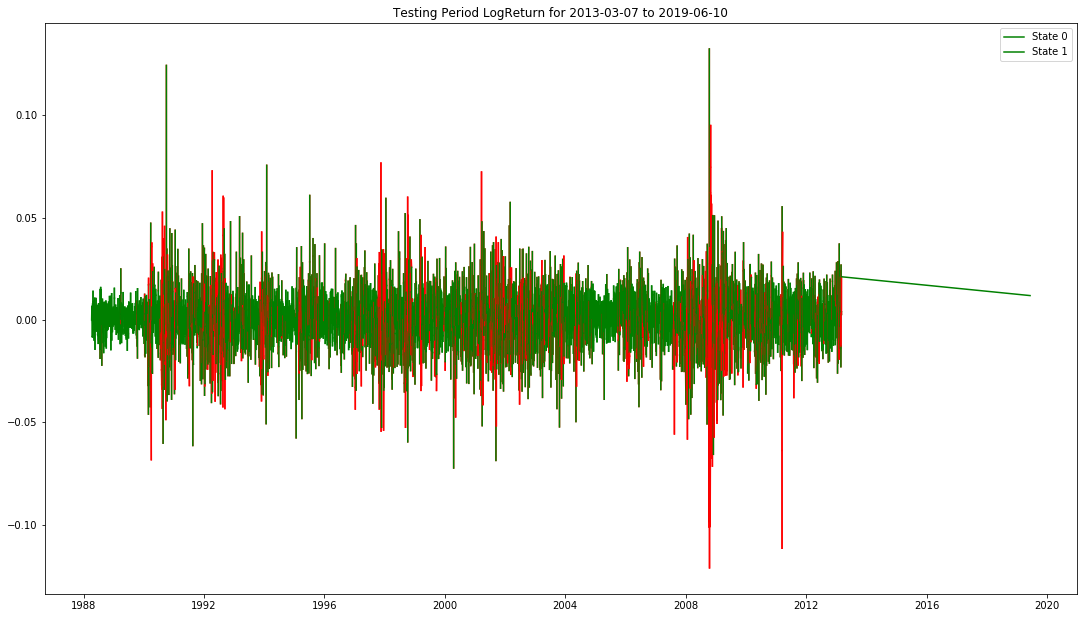

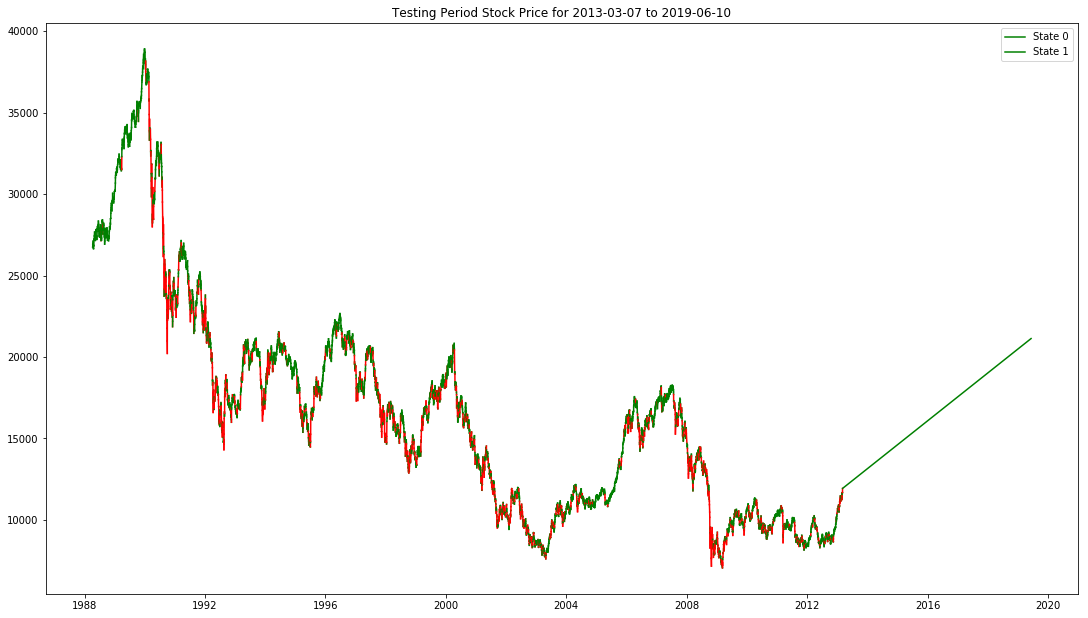

In [25]:
# For Training Period
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
        training_0_logret.append(ret[3][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
        training_1_logret.append(ret[3][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period LogReturn for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()
##################################################################################
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
        training_0_close.append(ret[2][i1])
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
        training_1_close.append(ret[2][i1])
plt.legend(['State 0','State 1'])
plt.title('Testing Period Stock Price for %.10s to %.10s'%(dates[test_p[0]],dates[test_p[1]]))
plt.show()

In [26]:
(np.average(testing_0_logret), np.var(testing_0_logret), np.average(testing_1_logret), np.var(testing_1_logret)),
(np.average(training_0_logret), np.var(training_0_logret), np.average(training_1_logret), np.var(training_1_logret))

(-0.0030758267614530697,
 0.0008806691814638609,
 0.0005660411905160767,
 6.77800449271819e-05)

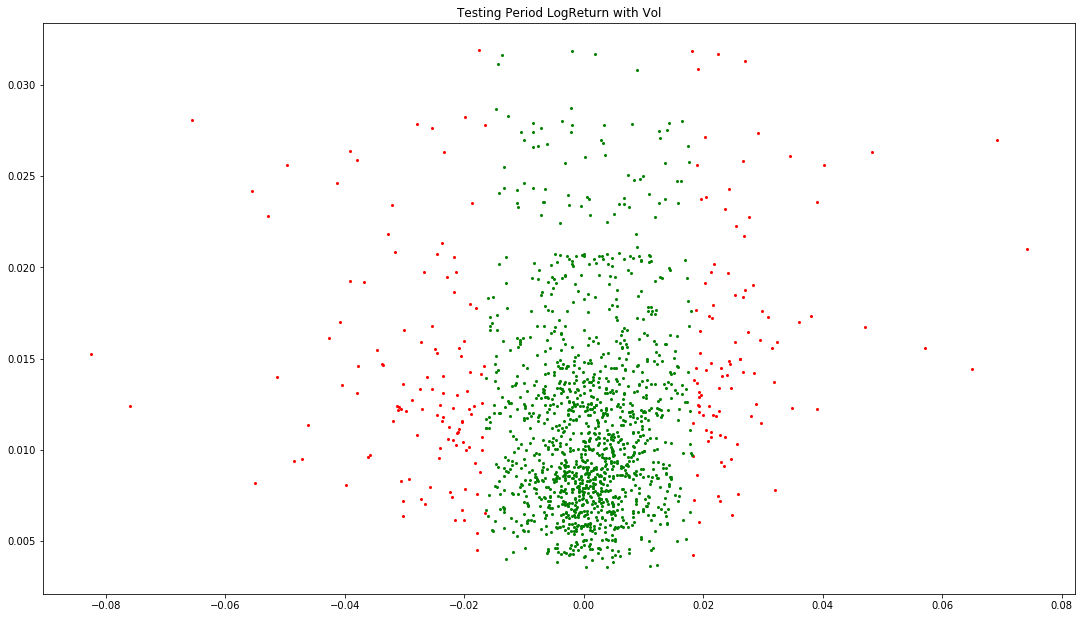

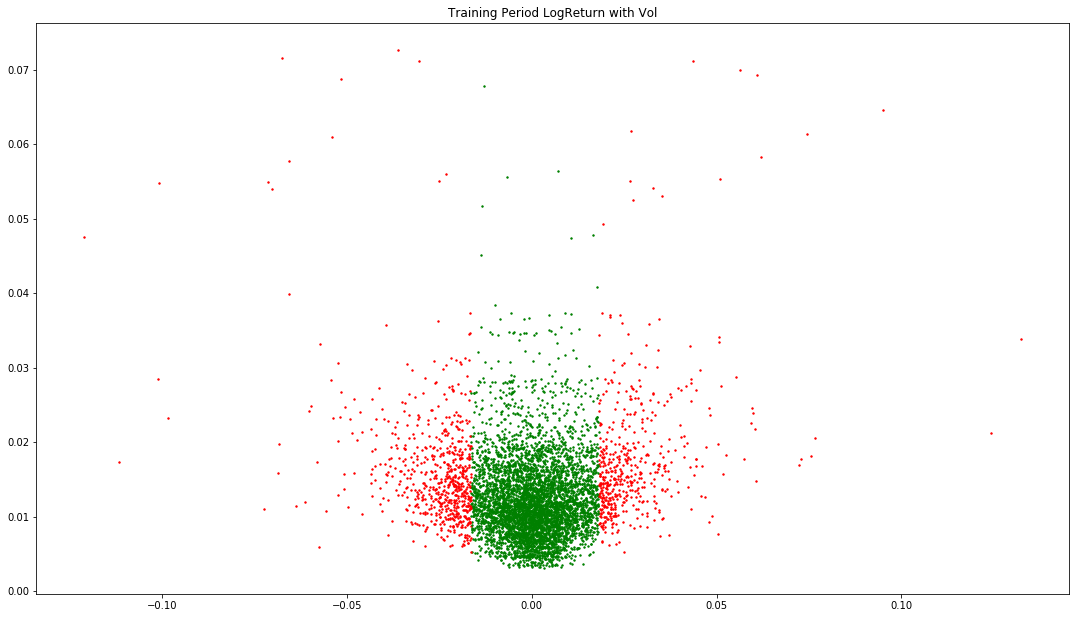

In [27]:
#testing
plot_scatter(ret,20,get_rolling_vol(20,ret[7]),highvol_mark,True)
#training
plot_scatter(ret,20,get_rolling_vol(20,ret[3]),highvol_mark,False)